# Integração de Python com Power BI

### 2 Formas de Fazer:

1. Usar o Python para fazer os tratamentos de bases de dados, criar colunas, etc. para importar para o Power BI depois -> biblioteca pandas -> exatamente como aprendemos no módulo de pandas

2. (O que vamos focar aqui). Usar scripts em Python diretamente dentro do Power BI

Obs: Você precisa do Power BI instalado no seu computador para isso funcionar. Caso não tenha ele instalado, na descrição tem o link ensinando a baixar e instalar gratuitamente.

### O que conseguimos fazer?

Basicamente, tudo o que temos feito no Python você consegue jogar para dentro do Power BI. Isso porque o Power BI tem um executor de scripts em Python, o que significa que ele roda nossos códigos lá dentro.

- Um dos maiores usos para Python no Power BI é a biblioteca do pandas, dado que ela trabalha com tabelas e o Power BI também.
- Além disso, as bibliotecas de visuais/gráficos também são muito úteis

### Como usar o Python no Power BI - 3 opções:

    1 - Como fonte de Dados
    2 - Para editar uma tabela no Editor de Consultas (Power Query)
    3 - Para criar um visual

### Antes de começar, configurações importantes

Arquivo -> Opções -> Scripts do Python:
- Verificar se o campo "Diretório base do Python" está onde você instalou o python no ambiente virtual
- Se não estiver (provavelmente não vai estar), ajeitar manualmente

### Pequeno teste

In [6]:
import pandas as pd

vendas_df = pd.read_csv(r'C:\Users\User\Programação\python-impressionador\Python e PowerBi\Contoso  - Vendas - 2017.csv', sep=';')



# Integração Parte 1 - Python para "Criar" Bases de Dados
Integração Parte 1 - Python para "Criar" Bases de Dados

### Qual arquivo vamos importar?

- Vamos usar o mesmo exemplo que usamos da empresa Contoso no módulo de Análise de Dados

Temos 4 arquivos diferentes:
- Vendas
- Lojas
- Clientes
- Produtos

E vamos integrar eles em 1 arquivo único apenas com as informações relevantes. Depois, vamos importar essa base tratada para o Power BI

In [7]:
import pandas as pd
import os
#importando os arquivos
caminho_padrao = r'C:\Users\User\Programação\python-impressionador\Python e PowerBi'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso  - Vendas - 2017.csv'), sep=';')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Cadastro Produtos.csv'), sep=';')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Lojas.csv'), sep=';')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Clientes.csv'), sep=';')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


### Script no power Query
Outro modo de usar o Python no Power BI é executando um script Python para editar tabelas no Power Query.

Para efeitos de teste, será filtrado as linhas, permanecendo somente aquelas que tenham as 3 primeiras Lojas.


    Id             Loja
    86           Loja Contoso Austin	
    306          Loja Contoso Europe Online
    172          Loja Contoso Hartford	
    
    
    nota: No PowerBI, nossa tabela é nomeada como 'dataset'

In [8]:
dataset = vendas_df

tres_lojas_df = dataset[dataset['ID Loja'].isin([86,306,172])]
tres_lojas_df

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,21/05/2017,22/05/2017,1,86,981,1,21344,10,0,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,08/06/2017,11/06/2017,3,172,1287,1,559,5,0,Contoso Genuine Leather Grip Belt E322 White,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,17/09/2017,23/09/2017,6,172,1236,3,13331,6,0,"Fabrikam Social Videographer 1"" 25mm E400 Blue",Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,18/10/2017,19/10/2017,1,172,1243,1,3459,5,0,Fabrikam Social Videographer 1'' 25mm E400 White,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,30/10/2017,02/11/2017,3,172,937,1,341,10,0,SV 4GB Laptop Memory M65 White,Loja Contoso Hartford,mpadfield9g@usnews.com


### Script para visualizar gráficos
Outro modo de usar o Python no Power BI é executando um script Python para Criação de Visuais e Gráficos

Devem ser tomados alguns cuidados. 

Quando colocado a caixa de texto do Script Python no Power BI, deve ser inserido quais os valores quer utilizar naquele script, ou seja, será criado um dataframe com os dados selecionados.

No exemplo Seleciona-se Data da Venda , inicialmente ele vem em uma hierarquia de datas, então modifica-se para permanecer a data da venda normal, com o dia exato.

Nota-se que o Power BI automaticamente sugere um ajuste para eliminação de linhas duplicadas, porém não é de interesse que haja essa eliminação de forma deliberada, pois poderiam haver várias vendas em um mesmo dia.

A função de remoção de duplicadas será removida se todos os itens do dataFrame forem iguais, ou seja, quando adicionarmos a coluna de quantidade vendida e número da venda haverá uma segurança que não será apagados dados desnecessariamente, já que o campo NÚMERO DA VENDA deverá ser único para cada venda.

#### ATENÇÃO!!

Quando adiciona-se um campo dentro de uma caixa de visualização, o PowerBI geralmente já trata aquele valor (Como foi o exemplo de inclusão de DATA DA VENDA, que ele transformou inicialmente em Hierarquia de Datas)

Ao Adicionar NUMERO DE VENDAS e QUANTIDADE DE VENDAS, o PowerBI retorna o valor da quantidade Número de vendas que foram feitas, para que possa importar os índices dentro do DataFrame de forma que cada linha tenha seu numero de venda único, deve-se ajustar para a função *NÃO RESUMIR*






In [9]:
# LEMBRE-SE QUE NO POWERBI O DATAFRAME SEMPRE SE CHAMA dataset

dataset = tres_lojas_df

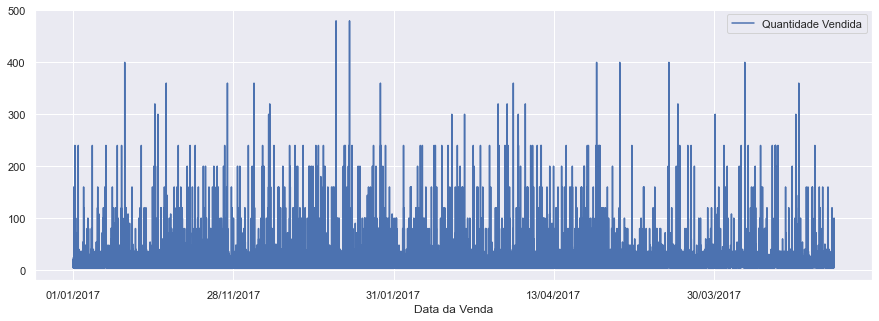

In [10]:
import matplotlib.pyplot as plt

dataset.plot(x='Data da Venda', y='Quantidade Vendida', figsize=(15,5))
plt.show()

### USANDO O SEABORN

#### Passo 2: Vamos agora criar um gráfico de linha para comparar as Vendas das 3 Lojas

Na documentação do seaborn : https://seaborn.pydata.org/examples/errorband_lineplots.html , vamos buscar o gráfico de linha que desegamos e copiar o código da documentação e editá-lo

### CÓDIGO NA DOCUMENTAÇÃO

import seaborn as sns

sns.set_theme(style="darkgrid")

##### #Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

##### #Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

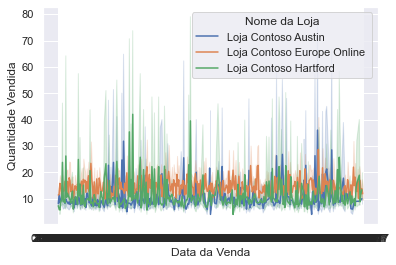

In [11]:
import seaborn as sns

sns.set_theme(style="darkgrid")

# A linha de fmri (Load an example) não é necessária, pois ja temos os dados que usaremos.

sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja", data=dataset)

# hue é para demonstrar mais de 1 linhas, e diferencias as cores
# style é o tipo de tracejado que pode alterar conforme os dados, sendo tracejada, continua e etc


plt.show()

O gráfico fica de difícil entendimento, sendo necessário algumas modificações para melhorar a vizualização.

Buscando no google encontra-se a documentação necessária para a modificação do gráfico, utilizando a biblioteca matplotlib

##### Atenção!!

No PowerBI deverá ser rodado o código depois da implantação do DataFrame que será utilizado, nesse caso, utilizando as colunas:

Numero da venda, Data da Venda, Quantidade Vendida, Nome da Loja 



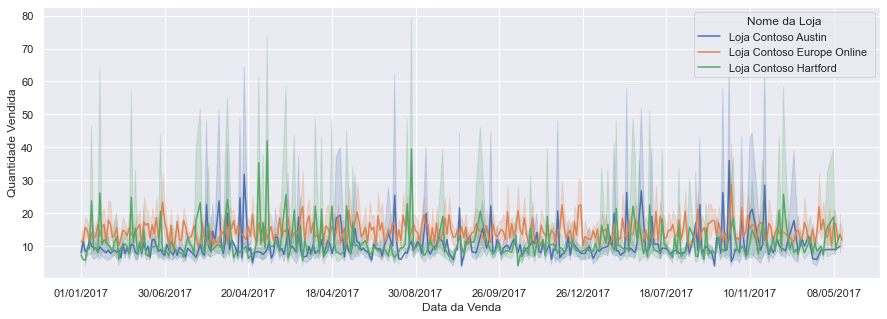

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,5)) # modifica o tamanho da figura
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # número de marcadores na legenda do eixo x, utilizamos 12 (1 para cada mês)

sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja", data=dataset, ax = ax)
# é necessário adicionar o parâmetro ax que modificamos com o matplotlib

plt.show()

#### Para melhorar , será alterado a Data pelo Mês correspondente

Para isso é necessário importar um DateFormatter

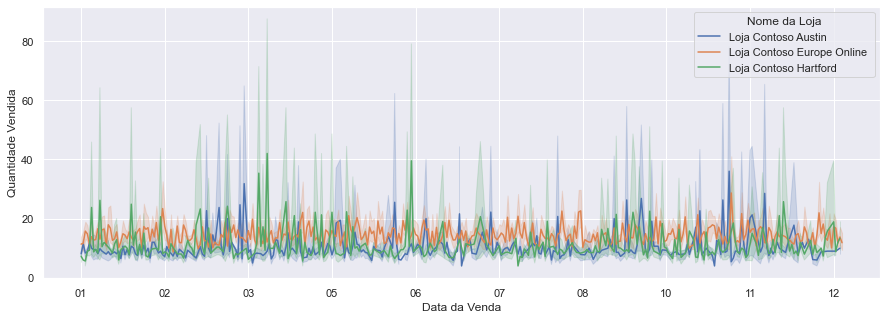

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,5)) 
# editando eixo
ax.xaxis.set_major_locator(plt.MaxNLocator(13))
ax.xaxis.set_major_formatter(DateFormatter('%m'))

sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja", data=dataset, ax = ax)

plt.show()